# Tarea 2 - Taller de Python para Ciencia de Datos
#### Integrantes: José Macías, Rayen Nahuelhual, Matías Madariaga

### Tabla de contenidos
1. [Acerca del set de datos](#0)
2. [Requisitos para ejecutar el código](#1)
3. [Modificación de datos](#2)
5. [Obtener información del set de datos y análisis](#4)
6. [Manipulación de Datos](#5)
7. [Estandarización de datos](#6)
8. [Normalización de datos](#7)
9. [Agrupar datos](#8)
10. [Almacenamiento del set de datos manipulado](#9)
11. [Generar Gráficos](#10)
 

### Acerca del set de datos <a id="0"></a>
Este set de datos consiste en casas que fueron vendido entre el año 2014 y 2015 de la ciudad de King County de Estados Unidos, donde se tienen las siguientes caracteristicas:
- El precio de la casa (price)
- Cantidad de habitaciones (bedrooms)
- Cantidad de baños (bathroom)
- Pies cuadrados del living (sqft_living)
- Pies cuadrados de la parcela (sqft_lot)
- Pies cuadrados del sotano (sqft_basement)
- Pies cuadrados del living de los vecinos (sqft_living15)
- Pies cuadrados del sotano de los vecinos (sqft_lot15)
- Puntaje de la casa (grade)
- Condición de la casa (condition)
- Coordenadas de la casa en longitud y latitud (lat y long)
- Cantidad de Pisos (floors)
- Año en que fue construido (yr_built)
- Año en que fue renovado (yr_renovated)
- Si la casa esta construido al borde de un lago (Waterfront)
- Si la casa contiene una (views)

Tambien están otras caracteristicas como la fecha en que fue vendida la casa (date), id, el codigo zip de la casa (zipcode)

### Requisitos para ejecutar el codigo <a id="1"></a>
Para ejecutar el codigo se necesita las librerias Matplotlib, Pandas y Numpy.
Si no tiene instalado estas librerias puede ejecutar el siguiente codigo

In [6]:
!pip install pandas
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


---
### Modificación set de datos <a id="2"></a>
Dado que el set de datos originalmente no presenta datos faltantes, utilizamos el siguiente codigo elaborado por nosotros para eliminar de maenra aleatoria datos para luego realizar acciones de manipulación de datos.

In [7]:
import pandas as pd
import numpy as np

ubicacion = "input/kc_house_data.csv"
df = pd.read_csv(ubicacion)


rng1 = np.random.default_rng()
delete_cant = 9500
headers = list(df.columns.values)
for i in range(delete_cant):
    index_header = np.random.randint(len(headers))
    get_header = headers[index_header]
    get_index = np.random.randint(len(df[get_header]))
    df[get_header][get_index] = None

df.to_csv('input/kc_house_data1.csv')

C:\Users\pc0507\AppData\Local\Temp\ipykernel_12856\3348188732.py:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[get_header][get_index] = None
C:\Users\pc0507\AppData\Local\Temp\ipykernel_12856\3348188732.py:15: SettingWithCopyWarning: 

---
## Ciencia de Datos - Manipulación de datos y generación de graficos <a id="3"></a>
### 1. Obtener información del set de datos y análisis <a id="4"></a>
Importamos las bibliotecas de Pandas y Numpy para la manipulación del set de datos

In [8]:
# importa las bibliotecas Pandas, Matplotlib y Numpy

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

Cargamos el set de datos con la función de pandas read_csv('file_path'), en esta ocasión, vamos a utilizar un set de datos de casas con sus características como cantidad de piezas, baños, tamaño del living, de la casa y del sotano, etc y su precio.

In [9]:
ubicacion = "./input/kc_house_data1.csv"
df = pd.read_csv(ubicacion)

Leemos las primeras 10 filas del dataframe y podemos verificar que efectivamente contienen encabezados, por lo que no sera necesario introducir uno. Price es la variable target del set de datos, que se puede predecir según las características que presente el hogar.

In [10]:
df.head(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7.129301e+09,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,1,6.414100e+09,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,2,5.631500e+09,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,3,2.487201e+09,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,4,1.954401e+09,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
5,5,7.237550e+09,20140512T000000,1225000.0,4.0,4.50,5420.0,101930.0,1.0,0.0,...,11.0,3890.0,1530.0,2001.0,0.0,98053.0,47.6561,-122.005,4760.0,101930.0
6,6,1.321400e+09,20140627T000000,257500.0,3.0,2.25,NaN,6819.0,2.0,0.0,...,7.0,1715.0,0.0,1995.0,0.0,NaN,47.3097,-122.327,2238.0,6819.0
7,7,2.008000e+09,20150115T000000,291850.0,3.0,1.50,1060.0,9711.0,1.0,0.0,...,7.0,1060.0,0.0,1963.0,0.0,98198.0,47.4095,-122.315,1650.0,9711.0
8,8,2.414600e+09,20150415T000000,229500.0,3.0,1.00,1780.0,7470.0,1.0,0.0,...,7.0,1050.0,730.0,1960.0,0.0,98146.0,47.5123,-122.337,1780.0,8113.0
9,9,3.793500e+09,20150312T000000,323000.0,3.0,2.50,1890.0,6560.0,2.0,0.0,...,7.0,1890.0,0.0,2003.0,0.0,98038.0,47.3684,-122.031,2390.0,7570.0


Se obtiene información acerca del set de datos, utilizando la funcion info() de pandas, al ejecutarlo, podemos observar que la gran mayoria de las columnas son del tipo numero float64 o int64, siendo la excepción la columna date que es la fecha y esta representada como object.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21151 non-null  float64
 2   date           21194 non-null  object 
 3   price          21155 non-null  float64
 4   bedrooms       21155 non-null  float64
 5   bathrooms      21148 non-null  float64
 6   sqft_living    21174 non-null  float64
 7   sqft_lot       21164 non-null  float64
 8   floors         21189 non-null  float64
 9   waterfront     21177 non-null  float64
 10  view           21163 non-null  float64
 11  condition      21175 non-null  float64
 12  grade          21147 non-null  float64
 13  sqft_above     21146 non-null  float64
 14  sqft_basement  21167 non-null  float64
 15  yr_built       21177 non-null  float64
 16  yr_renovated   21171 non-null  float64
 17  zipcode        21195 non-null  float64
 18  lat   

Se verifica los datos nulos del set de datos y podemos observar que 23 columnas presentan valores faltante, entre ellos la mas importante que es la columna price, vamos a realizar una manipulación de datos para rellenar los datos faltantes y sacar columnas innecesarias o filas que tengan faltante la variable precio.

In [12]:
print ('Datos Faltantes:')
df.isnull().sum()

Datos Faltantes:


Unnamed: 0         0
id               462
date             419
price            458
bedrooms         458
bathrooms        465
sqft_living      439
sqft_lot         449
floors           424
waterfront       436
view             450
condition        438
grade            466
sqft_above       467
sqft_basement    446
yr_built         436
yr_renovated     442
zipcode          418
lat              459
long             431
sqft_living15    480
sqft_lot15       434
dtype: int64

In [13]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.115100e+04,2.115500e+04,21155.000000,21148.000000,21174.000000,2.116400e+04,21189.000000,21177.00000,21163.000000,...,21147.000000,21146.000000,21167.000000,21177.000000,21171.000000,21195.000000,21154.000000,21182.000000,21133.000000,21179.000000
mean,10806.00000,4.582241e+09,5.406153e+05,3.371023,2.115153,2079.845140,1.513570e+04,1.494054,0.00765,0.234230,...,7.655459,1788.510120,292.476402,1971.009728,83.618346,98077.969568,47.559813,-122.213734,1986.649506,12752.647009
std,6239.28002,2.876713e+09,3.682767e+05,0.930527,0.769304,918.989373,4.165940e+04,0.539708,0.08713,0.766216,...,1.175623,828.382085,442.228358,29.371704,399.890048,53.503992,0.138608,0.140924,686.118161,27293.850291
min,0.00000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.00000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.217250e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.00000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470400,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904980e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.00000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571400,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.312050e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.067100e+04,2.000000,0.00000,0.000000,...,8.000000,2210.000000,570.000000,1997.000000,0.000000,98118.000000,47.677900,-122.125000,2360.000000,10080.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.00000,4.000000,...,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### 2. Manipulación de Datos <a id="5"></a>
Vamos a Eliminar las columnas innecesarias, como el unnamed: 0, date ,id y zipcode y eliminar las filas que contengan datos faltante en la columna precio, ya que es la variable objetiva y no podemos rellenar los datos faltantes con aproximaciones ya que podría afectar en la predicción y gráficos.
También, vamos a eliminar las filas que falten datos tanto en la latitud como en la longitud para mapas.

In [14]:
df.drop(columns=['Unnamed: 0','date', 'zipcode', 'id'], inplace=True)

df.dropna(subset=["price"], axis=0, inplace=True)
df.dropna(subset=["lat", "long"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,47.6168,-122.045,1800.0,7503.0
5,1225000.0,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3.0,11.0,3890.0,1530.0,2001.0,0.0,47.6561,-122.005,4760.0,101930.0
6,257500.0,3.0,2.25,NaN,6819.0,2.0,0.0,0.0,3.0,7.0,1715.0,0.0,1995.0,0.0,47.3097,-122.327,2238.0,6819.0
7,291850.0,3.0,1.50,1060.0,9711.0,1.0,0.0,0.0,3.0,7.0,1060.0,0.0,1963.0,0.0,47.4095,-122.315,1650.0,9711.0
8,229500.0,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,3.0,7.0,1050.0,730.0,1960.0,0.0,47.5123,-122.337,1780.0,8113.0
9,323000.0,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3.0,7.0,1890.0,0.0,2003.0,0.0,47.3684,-122.031,2390.0,7570.0


Para las columnas waterfront y view, que corresponden a casas que están en el borde del rio o agua y que tengan buena vista respectivamente, tienen valores binarios para representar si lo tienen o no. Para los datos faltantes, vamos a reemplazarlos con la mediana de cada uno.

In [15]:
print('Mediana columna waterfront:'+ str(df['waterfront'].value_counts().idxmax()))
print('Mediana columna view:'+ str(df['view'].value_counts().idxmax()))

#El valor que se repite en ambas es 0, por lo tanto, vamos a reemplazar los datos faltantes de estas columnas con 0

df["waterfront"].replace(np.nan, 0, inplace=True)
df["view"].replace(np.nan, 0, inplace=True)


Mediana columna waterfront:0.0
Mediana columna view:0.0


C:\Users\pc0507\AppData\Local\Temp\ipykernel_12856\3827042038.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["waterfront"].replace(np.nan, 0, inplace=True)
C:\Users\pc0507\AppData\Local\Temp\ipykernel_12856\3827042038.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

Para las columnas bedrooms, bathrooms, floors, grade y conditions vamos a utilizar el numero que mas se repita (la mediana) para reemplazar los datos faltantes

In [16]:
print('Mediana columna bedrooms:'+ str(df['bedrooms'].value_counts().idxmax()))
print('Mediana columna bathrooms:'+ str(df['bathrooms'].value_counts().idxmax()))
print('Mediana columna floors:'+ str(df['floors'].value_counts().idxmax()))
print('Mediana columna grade:'+ str(df['grade'].value_counts().idxmax()))
print('Mediana columna condition:'+ str(df['condition'].value_counts().idxmax()))

#Los valores que se repiten en las columnas bedrooms, bathrooms, floors, grade y condition  son 3, 2.5, 1, 7 y 3 respectivamente, vamos a reemplazar los datos faltantes por estos a cada columna
df["bedrooms"].replace(np.nan, 3, inplace=True)
df["bathrooms"].replace(np.nan, 2.5, inplace=True)
df["floors"].replace(np.nan, 1, inplace=True)
df["grade"].replace(np.nan, 7, inplace=True)
df["condition"].replace(np.nan, 3, inplace=True)


Mediana columna bedrooms:3.0
Mediana columna bathrooms:2.5
Mediana columna floors:1.0
Mediana columna grade:7.0
Mediana columna condition:3.0


C:\Users\pc0507\AppData\Local\Temp\ipykernel_12856\2196100878.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bedrooms"].replace(np.nan, 3, inplace=True)
C:\Users\pc0507\AppData\Local\Temp\ipykernel_12856\2196100878.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

Para las columnas sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15 y sqft_lot15, vamos a reemplazar sus datos faltantes por el promedio de cada uno.

In [17]:
sqft_living_mean =df['sqft_living'].mean(axis=0)
sqft_lot_mean =df['sqft_lot'].mean(axis=0)
sqft_above_mean =df['sqft_above'].mean(axis=0)
sqft_basement_mean =df['sqft_basement'].mean(axis=0)
sqft_living15_mean =df['sqft_living15'].mean(axis=0)
sqft_lot15_mean =df['sqft_lot15'].mean(axis=0)

df["sqft_living"].replace(np.nan, sqft_living_mean, inplace=True)
df["sqft_lot"].replace(np.nan, sqft_lot_mean, inplace=True)
df["sqft_above"].replace(np.nan, sqft_above_mean, inplace=True)
df["sqft_basement"].replace(np.nan, sqft_basement_mean, inplace=True)
df["sqft_living15"].replace(np.nan, sqft_living15_mean, inplace=True)
df["sqft_lot15"].replace(np.nan, sqft_lot15_mean, inplace=True)


C:\Users\pc0507\AppData\Local\Temp\ipykernel_12856\2642296672.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sqft_living"].replace(np.nan, sqft_living_mean, inplace=True)
C:\Users\pc0507\AppData\Local\Temp\ipykernel_12856\2642296672.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

Para las columnas yr_built y yr_renovated, vamos a reemplazar sus datos faltantes por la mediana

In [18]:
print('Mediana columna yr_built:'+ str(df['yr_built'].value_counts().idxmax()))
print('Mediana columna yr_renovated:'+ str(df['yr_renovated'].value_counts().idxmax()))

#El valor que se repite es 2014 para yr_build y 0 para yr_renovated


df["yr_built"].replace(np.nan, 2014, inplace=True)
df["yr_renovated"].replace(np.nan, 0, inplace=True)


Mediana columna yr_built:2014.0
Mediana columna yr_renovated:0.0


C:\Users\pc0507\AppData\Local\Temp\ipykernel_12856\1917102421.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["yr_built"].replace(np.nan, 2014, inplace=True)
C:\Users\pc0507\AppData\Local\Temp\ipykernel_12856\1917102421.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

### 3. Estandarización de datos <a id="6"></a>
Las columnas que empiezan con sqft_ son las medidas del hogar, tanto del sotano, techo o living, estas columnas estan representados en pie cuadrado, vamos a transformarlos a m2 utilizando la siguiente formula: __m2 = sqft/10.764__

In [19]:
df["m2_living"] = df["sqft_living"]/10.764
df["m2_lot"] = df["sqft_lot"]/10.764
df["m2_above"] = df["sqft_above"]/10.764
df["m2_basement"] = df["sqft_basement"]/10.764
df["m2_living15"] = df["sqft_living15"]/10.764
df["m2_lot15"] = df["sqft_lot15"]/10.764

df.drop(columns=['sqft_lot15', 'sqft_living15', 'sqft_basement', 'sqft_above', 'sqft_lot', 'sqft_living'], inplace=True)

df.head(10)

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,m2_living,m2_lot,m2_above,m2_basement,m2_living15,m2_lot15
0,221900.0,3.0,1.00,1.0,0.0,0.0,3.0,7.0,1955.0,0.0,47.5112,-122.257,109.624675,524.897808,109.624675,0.000000,124.489038,524.897808
1,538000.0,3.0,2.25,2.0,0.0,0.0,3.0,7.0,1951.0,1991.0,47.7210,-122.319,238.758826,672.798216,201.597919,37.160907,157.004831,709.680416
2,180000.0,2.0,1.00,1.0,0.0,0.0,3.0,6.0,1933.0,0.0,47.7379,-122.233,71.534745,929.022668,71.534745,0.000000,252.694166,748.978075
3,604000.0,4.0,3.00,1.0,0.0,0.0,5.0,7.0,1965.0,0.0,47.5208,-122.393,182.088443,464.511334,97.547380,84.541063,126.347083,464.511334
4,510000.0,3.0,2.00,1.0,0.0,0.0,3.0,8.0,1987.0,0.0,47.6168,-122.045,156.075808,750.650316,156.075808,0.000000,167.224080,697.045708
5,1225000.0,4.0,4.50,1.0,0.0,0.0,3.0,11.0,2001.0,0.0,47.6561,-122.005,503.530286,9469.528056,361.389818,142.140468,442.214790,9469.528056
6,257500.0,3.0,2.25,2.0,0.0,0.0,3.0,7.0,1995.0,0.0,47.3097,-122.327,193.388135,633.500557,159.327388,0.000000,207.915273,633.500557
7,291850.0,3.0,1.50,1.0,0.0,0.0,3.0,7.0,1963.0,0.0,47.4095,-122.315,98.476403,902.173913,98.476403,0.000000,153.288740,902.173913
8,229500.0,3.0,1.00,1.0,0.0,0.0,3.0,7.0,1960.0,0.0,47.5123,-122.337,165.366035,693.979933,97.547380,67.818655,165.366035,753.716091
9,323000.0,3.0,2.50,2.0,0.0,0.0,3.0,7.0,2003.0,0.0,47.3684,-122.031,175.585284,609.438870,175.585284,0.000000,222.036418,703.270160


### 4. Normalización de Datos <a id="7"></a>
Vamos a normalizar datos los datos de grade, donde vamos a dividir las notas de las casas (grade) con respecto a la nota maxima, en este caso es 13. Vamos a utilizar la función max para obtener el máximo de nota y dividir todos los datos de la columna por este máximo.

In [20]:
df['grade-normalized'] = df['grade']/df['grade'].max()
df.head(10)

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,m2_living,m2_lot,m2_above,m2_basement,m2_living15,m2_lot15,grade-normalized
0,221900.0,3.0,1.00,1.0,0.0,0.0,3.0,7.0,1955.0,0.0,47.5112,-122.257,109.624675,524.897808,109.624675,0.000000,124.489038,524.897808,0.538462
1,538000.0,3.0,2.25,2.0,0.0,0.0,3.0,7.0,1951.0,1991.0,47.7210,-122.319,238.758826,672.798216,201.597919,37.160907,157.004831,709.680416,0.538462
2,180000.0,2.0,1.00,1.0,0.0,0.0,3.0,6.0,1933.0,0.0,47.7379,-122.233,71.534745,929.022668,71.534745,0.000000,252.694166,748.978075,0.461538
3,604000.0,4.0,3.00,1.0,0.0,0.0,5.0,7.0,1965.0,0.0,47.5208,-122.393,182.088443,464.511334,97.547380,84.541063,126.347083,464.511334,0.538462
4,510000.0,3.0,2.00,1.0,0.0,0.0,3.0,8.0,1987.0,0.0,47.6168,-122.045,156.075808,750.650316,156.075808,0.000000,167.224080,697.045708,0.615385
5,1225000.0,4.0,4.50,1.0,0.0,0.0,3.0,11.0,2001.0,0.0,47.6561,-122.005,503.530286,9469.528056,361.389818,142.140468,442.214790,9469.528056,0.846154
6,257500.0,3.0,2.25,2.0,0.0,0.0,3.0,7.0,1995.0,0.0,47.3097,-122.327,193.388135,633.500557,159.327388,0.000000,207.915273,633.500557,0.538462
7,291850.0,3.0,1.50,1.0,0.0,0.0,3.0,7.0,1963.0,0.0,47.4095,-122.315,98.476403,902.173913,98.476403,0.000000,153.288740,902.173913,0.538462
8,229500.0,3.0,1.00,1.0,0.0,0.0,3.0,7.0,1960.0,0.0,47.5123,-122.337,165.366035,693.979933,97.547380,67.818655,165.366035,753.716091,0.538462
9,323000.0,3.0,2.50,2.0,0.0,0.0,3.0,7.0,2003.0,0.0,47.3684,-122.031,175.585284,609.438870,175.585284,0.000000,222.036418,703.270160,0.538462


### 5. Agrupar Datos <a id="8"></a>
Agruparemos la columna condition, que indica de manera numérica la condición de la casa, mientras mas alto, mejor es la condición de la casa.
Transformamos la columna de float a int:

In [21]:
df["condition"]=df["condition"].astype(int, copy=True)
df["yr_built"]=df["yr_built"].astype(int, copy=True)
df["yr_renovated"]=df["yr_renovated"].astype(int, copy=True)


Creamos una lista con 4 elementos del mínimo de la condición (1) y el máximo (5), y otra lista con strings, donde contengan las etiquetas correspondientes a la condición que tenga la casa:
- Si la condición esta evaluada entre 1 a 2.3, entonces tendrá una etiqueta "Mala" indicando que la condición de la casa es mala
- Si la condición esta evaluada entre 2.3 y 3.7, entonces tendrá una etiqueta "OK", indicando que la condición de la casa es mediocre
- Si la condición esta evaluada entre 3.7 y 5, entonces tendrá una etiqueta de "Buena", indicando que la condición de la casa es buena.
Se realiza la modificación a la columna con la funcion pd.cut con las etiquetas mencionada anteriormente.

In [22]:
condition_lin = np.linspace(min(df["condition"]), max(df["condition"]), 4)
name_condition_lin = ['Bad', 'Ok', 'Great']
df['condition'] = pd.cut(df['condition'], condition_lin, labels=name_condition_lin, include_lowest=True )
df.head(10)

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,m2_living,m2_lot,m2_above,m2_basement,m2_living15,m2_lot15,grade-normalized
0,221900.0,3.0,1.00,1.0,0.0,0.0,Ok,7.0,1955,0,47.5112,-122.257,109.624675,524.897808,109.624675,0.000000,124.489038,524.897808,0.538462
1,538000.0,3.0,2.25,2.0,0.0,0.0,Ok,7.0,1951,1991,47.7210,-122.319,238.758826,672.798216,201.597919,37.160907,157.004831,709.680416,0.538462
2,180000.0,2.0,1.00,1.0,0.0,0.0,Ok,6.0,1933,0,47.7379,-122.233,71.534745,929.022668,71.534745,0.000000,252.694166,748.978075,0.461538
3,604000.0,4.0,3.00,1.0,0.0,0.0,Great,7.0,1965,0,47.5208,-122.393,182.088443,464.511334,97.547380,84.541063,126.347083,464.511334,0.538462
4,510000.0,3.0,2.00,1.0,0.0,0.0,Ok,8.0,1987,0,47.6168,-122.045,156.075808,750.650316,156.075808,0.000000,167.224080,697.045708,0.615385
5,1225000.0,4.0,4.50,1.0,0.0,0.0,Ok,11.0,2001,0,47.6561,-122.005,503.530286,9469.528056,361.389818,142.140468,442.214790,9469.528056,0.846154
6,257500.0,3.0,2.25,2.0,0.0,0.0,Ok,7.0,1995,0,47.3097,-122.327,193.388135,633.500557,159.327388,0.000000,207.915273,633.500557,0.538462
7,291850.0,3.0,1.50,1.0,0.0,0.0,Ok,7.0,1963,0,47.4095,-122.315,98.476403,902.173913,98.476403,0.000000,153.288740,902.173913,0.538462
8,229500.0,3.0,1.00,1.0,0.0,0.0,Ok,7.0,1960,0,47.5123,-122.337,165.366035,693.979933,97.547380,67.818655,165.366035,753.716091,0.538462
9,323000.0,3.0,2.50,2.0,0.0,0.0,Ok,7.0,2003,0,47.3684,-122.031,175.585284,609.438870,175.585284,0.000000,222.036418,703.270160,0.538462


Vamos a transfomar la columna categorica condition a una numerica, vamos a utilizar el metodo binario, donde vamos a dividir en tres columnas: condition_ok, condition_bad, condition_great, donde por ejemplo si una casa tiene una condición de OK, entonces en la columna condition_ok va a tener un valor 1 y el resto 0.

In [23]:
df['condition_ok'] = df['condition']=='Ok'
df['condition_bad'] = df['condition']=='Bad'
df['condition_great'] = df['condition']=='Great'
df['condition_ok'] = df['condition_ok'].astype(int,copy=True)
df['condition_bad'] = df['condition_bad'].astype(int,copy=True)
df['condition_great']=df['condition_great'].astype(int,copy=True)

df.head(10)

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,...,m2_living,m2_lot,m2_above,m2_basement,m2_living15,m2_lot15,grade-normalized,condition_ok,condition_bad,condition_great
0,221900.0,3.0,1.00,1.0,0.0,0.0,Ok,7.0,1955,0,...,109.624675,524.897808,109.624675,0.000000,124.489038,524.897808,0.538462,1,0,0
1,538000.0,3.0,2.25,2.0,0.0,0.0,Ok,7.0,1951,1991,...,238.758826,672.798216,201.597919,37.160907,157.004831,709.680416,0.538462,1,0,0
2,180000.0,2.0,1.00,1.0,0.0,0.0,Ok,6.0,1933,0,...,71.534745,929.022668,71.534745,0.000000,252.694166,748.978075,0.461538,1,0,0
3,604000.0,4.0,3.00,1.0,0.0,0.0,Great,7.0,1965,0,...,182.088443,464.511334,97.547380,84.541063,126.347083,464.511334,0.538462,0,0,1
4,510000.0,3.0,2.00,1.0,0.0,0.0,Ok,8.0,1987,0,...,156.075808,750.650316,156.075808,0.000000,167.224080,697.045708,0.615385,1,0,0
5,1225000.0,4.0,4.50,1.0,0.0,0.0,Ok,11.0,2001,0,...,503.530286,9469.528056,361.389818,142.140468,442.214790,9469.528056,0.846154,1,0,0
6,257500.0,3.0,2.25,2.0,0.0,0.0,Ok,7.0,1995,0,...,193.388135,633.500557,159.327388,0.000000,207.915273,633.500557,0.538462,1,0,0
7,291850.0,3.0,1.50,1.0,0.0,0.0,Ok,7.0,1963,0,...,98.476403,902.173913,98.476403,0.000000,153.288740,902.173913,0.538462,1,0,0
8,229500.0,3.0,1.00,1.0,0.0,0.0,Ok,7.0,1960,0,...,165.366035,693.979933,97.547380,67.818655,165.366035,753.716091,0.538462,1,0,0
9,323000.0,3.0,2.50,2.0,0.0,0.0,Ok,7.0,2003,0,...,175.585284,609.438870,175.585284,0.000000,222.036418,703.270160,0.538462,1,0,0


### 6. Almacenamiento del set de datos manipulado <a id="9"></a>
Se utilizara la funcion de .to_csv para almacenar el set de datos manipulados en un csv, se almacenara en la carpeta output.

In [26]:
df.to_csv('output/kc_house_data_modified.csv')


,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,...,m2_living,m2_lot,m2_above,m2_basement,m2_living15,m2_lot15,grade-normalized,condition_ok,condition_bad,condition_great
0,221900.0,3.0,1.00,1.0,0.0,0.0,Ok,7.0,1955,0,...,109.624675,524.897808,109.624675,0.000000,124.489038,524.897808,0.538462,1,0,0
1,538000.0,3.0,2.25,2.0,0.0,0.0,Ok,7.0,1951,1991,...,238.758826,672.798216,201.597919,37.160907,157.004831,709.680416,0.538462,1,0,0
2,180000.0,2.0,1.00,1.0,0.0,0.0,Ok,6.0,1933,0,...,71.534745,929.022668,71.534745,0.000000,252.694166,748.978075,0.461538,1,0,0
3,604000.0,4.0,3.00,1.0,0.0,0.0,Great,7.0,1965,0,...,182.088443,464.511334,97.547380,84.541063,126.347083,464.511334,0.538462,0,0,1
4,510000.0,3.0,2.00,1.0,0.0,0.0,Ok,8.0,1987,0,...,156.075808,750.650316,156.075808,0.000000,167.224080,697.045708,0.615385,1,0,0
5,1225000.0,4.0,4.50,1.0,0.0,0.0,Ok,11.0,2001,0,...,503.530286,9469.528056,361.389818,142.140468,442.214790,9469.528056,0.846154,1,0,0
6,257500.0,3.0,2.25,2.0,0.0,0.0,Ok,7.0,1995,0,...,193.388135,633.500557,159.327388,0.000000,207.915273,633.500557,0.538462,1,0,0
7,291850.0,3.0,1.50,1.0,0.0,0.0,Ok,7.0,1963,0,...,98.476403,902.173913,98.476403,0.000000,153.288740,902.173913,0.538462,1,0,0
8,229500.0,3.0,1.00,1.0,0.0,0.0,Ok,7.0,1960,0,...,165.366035,693.979933,97.547380,67.818655,165.366035,753.716091,0.538462,1,0,0
9,323000.0,3.0,2.50,2.0,0.0,0.0,Ok,7.0,2003,0,...,175.585284,609.438870,175.585284,0.000000,222.036418,703.270160,0.538462,1,0,0


### 7. Generar graficos <a id="10"></a>
Todos los graficos seran almacenados en la carpeta output como un archivo de imagen de formato PNG.

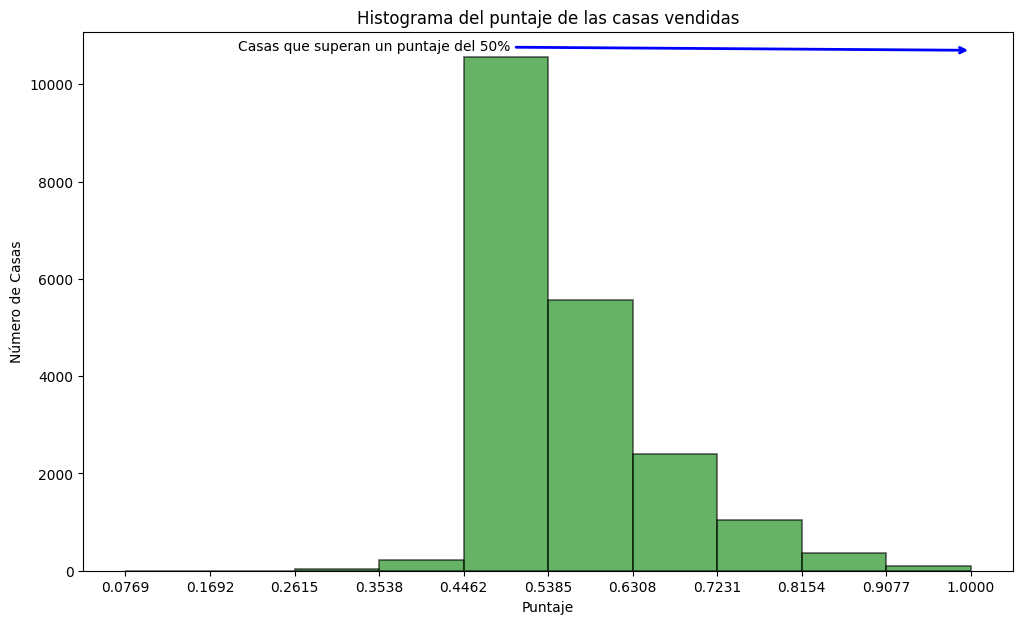

In [25]:
contador_nota, bordes_nota = np.histogram(df['grade-normalized'])
df['grade-normalized'].plot(kind='hist', color="green",figsize=(12, 7), edgecolor='black', linewidth=1.2, alpha=0.6, xticks=bordes_nota)
# Agregar un título al histograma
plt.title('Histograma del puntaje de las casas vendidas')
# Agregar etiqueta al eje y
plt.ylabel('Número de Casas')
# Agregar etiqueta al eje x
plt.xlabel('Puntaje')

plt.annotate('Casas que superan un puntaje del 50%',  # s: str. Dejar en blanco para que no haya texto
             xy=(1, 10700),  # posiciona la cabeza de la flecha en el punto (alo 2012 , pobla 70)
             xytext=(0.2, 10700),  # posiciona la base de la flecha en el punto (año 2008 , pobla 20)
             xycoords='data',  # se usará el sistema de coordenada del objeto donde se esta haciendo la anotación
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )
plt.savefig('output/hist_grado_casas.png')

In [66]:
suma_col = ['condition_ok', 'condition_bad','condition_great'] 
df_condition = df.groupby('condition')[suma_col].sum()

print(type(df.groupby('condition', axis=0)))

df_condition['Total'] = df_condition.sum(axis=1)


df_condition.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


C:\Users\pc0507\AppData\Local\Temp\ipykernel_12856\3086000311.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_condition = df.groupby('condition')[suma_col].sum()
C:\Users\pc0507\AppData\Local\Temp\ipykernel_12856\3086000311.py:4: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  print(type(df.groupby('condition', axis=0)))
C:\Users\pc0507\AppData\Local\Temp\ipykernel_12856\3086000311.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(type(df.groupby('condition', axis=0)))


,condition_ok,condition_bad,condition_great,Total
condition,,,,
Bad,0,190,0,190
Ok,13330,0,0,13330
Great,0,0,6766,6766


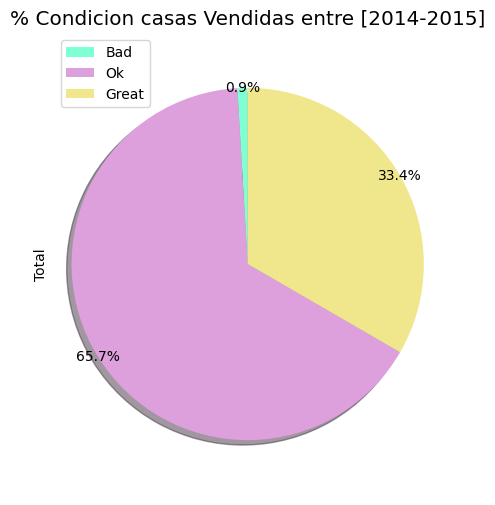

In [96]:
# autopct crear %, el ángulo de inicio representa el punto de inicio
lista_colores = ['aquamarine', 'plum', 'khaki']
df_condition['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # añadir en porcentajes
                            startangle = 90,
                            pctdistance=1,
                            labels=None,  
                            shadow=True,       # añadir sombra
                             colors=lista_colores,     
                            )

total_viviendas = df_condition['Total'].sum()
plt.annotate('Cantidad de casas vendidas: {total_viviendas}',
             xy=(1, 10),
            xytext=(2, 10)
           
            )
plt.title('% Condicion casas Vendidas entre [2014-2015]', size="x-large")
plt.legend(labels=df_condition.index, loc='upper left') 
plt.axis('equal') # Establece el gráfico para que parezca un círculo.

plt.show()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


C:\Users\pc0507\AppData\Local\Temp\ipykernel_12856\656121979.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_condition = df.groupby('condition')[suma_col].sum()
C:\Users\pc0507\AppData\Local\Temp\ipykernel_12856\656121979.py:4: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  print(type(df.groupby('condition', axis=0)))
C:\Users\pc0507\AppData\Local\Temp\ipykernel_12856\656121979.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(type(df.groupby('condition', axis=0)))


,condition_ok,condition_bad,condition_great,Total
condition,,,,
Bad,0,190,0,190
Ok,13330,0,0,13330
Great,0,0,6766,6766
